In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

In [2]:
train = pd.read_csv('/kaggle/input/disease-prediction-using-machine-learning/Training.csv')
test = pd.read_csv('/kaggle/input/disease-prediction-using-machine-learning/Testing.csv')

In [29]:
train.columns.to_list()

['itching',
 'skin_rash',
 'nodal_skin_eruptions',
 'continuous_sneezing',
 'shivering',
 'chills',
 'joint_pain',
 'stomach_pain',
 'acidity',
 'ulcers_on_tongue',
 'muscle_wasting',
 'vomiting',
 'burning_micturition',
 'spotting_ urination',
 'fatigue',
 'weight_gain',
 'anxiety',
 'cold_hands_and_feets',
 'mood_swings',
 'weight_loss',
 'restlessness',
 'lethargy',
 'patches_in_throat',
 'irregular_sugar_level',
 'cough',
 'high_fever',
 'sunken_eyes',
 'breathlessness',
 'sweating',
 'dehydration',
 'indigestion',
 'headache',
 'yellowish_skin',
 'dark_urine',
 'nausea',
 'loss_of_appetite',
 'pain_behind_the_eyes',
 'back_pain',
 'constipation',
 'abdominal_pain',
 'diarrhoea',
 'mild_fever',
 'yellow_urine',
 'yellowing_of_eyes',
 'acute_liver_failure',
 'fluid_overload',
 'swelling_of_stomach',
 'swelled_lymph_nodes',
 'malaise',
 'blurred_and_distorted_vision',
 'phlegm',
 'throat_irritation',
 'redness_of_eyes',
 'sinus_pressure',
 'runny_nose',
 'congestion',
 'chest_pain',


In [3]:
train.head(2)

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis,Unnamed: 133
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN


In [4]:
train.columns

Index(['itching', 'skin_rash', 'nodal_skin_eruptions', 'continuous_sneezing',
       'shivering', 'chills', 'joint_pain', 'stomach_pain', 'acidity',
       'ulcers_on_tongue',
       ...
       'scurring', 'skin_peeling', 'silver_like_dusting',
       'small_dents_in_nails', 'inflammatory_nails', 'blister',
       'red_sore_around_nose', 'yellow_crust_ooze', 'prognosis',
       'Unnamed: 133'],
      dtype='object', length=134)

In [5]:
test.columns

Index(['itching', 'skin_rash', 'nodal_skin_eruptions', 'continuous_sneezing',
       'shivering', 'chills', 'joint_pain', 'stomach_pain', 'acidity',
       'ulcers_on_tongue',
       ...
       'blackheads', 'scurring', 'skin_peeling', 'silver_like_dusting',
       'small_dents_in_nails', 'inflammatory_nails', 'blister',
       'red_sore_around_nose', 'yellow_crust_ooze', 'prognosis'],
      dtype='object', length=133)

In [6]:
train.shape

(4920, 134)

In [7]:
test.shape

(42, 133)

In [8]:
train.drop(['Unnamed: 133'],axis=1,inplace=True)

In [9]:
train.isna().sum()

itching                 0
skin_rash               0
nodal_skin_eruptions    0
continuous_sneezing     0
shivering               0
                       ..
inflammatory_nails      0
blister                 0
red_sore_around_nose    0
yellow_crust_ooze       0
prognosis               0
Length: 133, dtype: int64

In [10]:
test.isnull().sum()

itching                 0
skin_rash               0
nodal_skin_eruptions    0
continuous_sneezing     0
shivering               0
                       ..
inflammatory_nails      0
blister                 0
red_sore_around_nose    0
yellow_crust_ooze       0
prognosis               0
Length: 133, dtype: int64

In [11]:
train.drop_duplicates()
test.drop_duplicates()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,0,0,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Allergy
2,0,0,0,0,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,GERD
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Chronic cholestasis
4,1,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,Drug Reaction
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Peptic ulcer diseae
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,AIDS
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Diabetes
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Gastroenteritis
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Bronchial Asthma


In [12]:
train.describe()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,pus_filled_pimples,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze
count,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,...,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000
mean,0.137805,0.159756,0.021951,0.045122,0.021951,0.162195,0.139024,0.045122,0.045122,0.021951,...,0.021951,0.021951,0.021951,0.023171,0.023171,0.023171,0.023171,0.023171,0.023171,0.023171
std,0.344730,0.366417,0.146539,0.207593,0.146539,0.368667,0.346007,0.207593,0.207593,0.146539,...,0.146539,0.146539,0.146539,0.150461,0.150461,0.150461,0.150461,0.150461,0.150461,0.150461
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [13]:
X_train = train.drop(['prognosis'],axis=1)
X_test = test.drop(['prognosis'],axis=1)

y_train = train['prognosis']
y_test = test['prognosis']

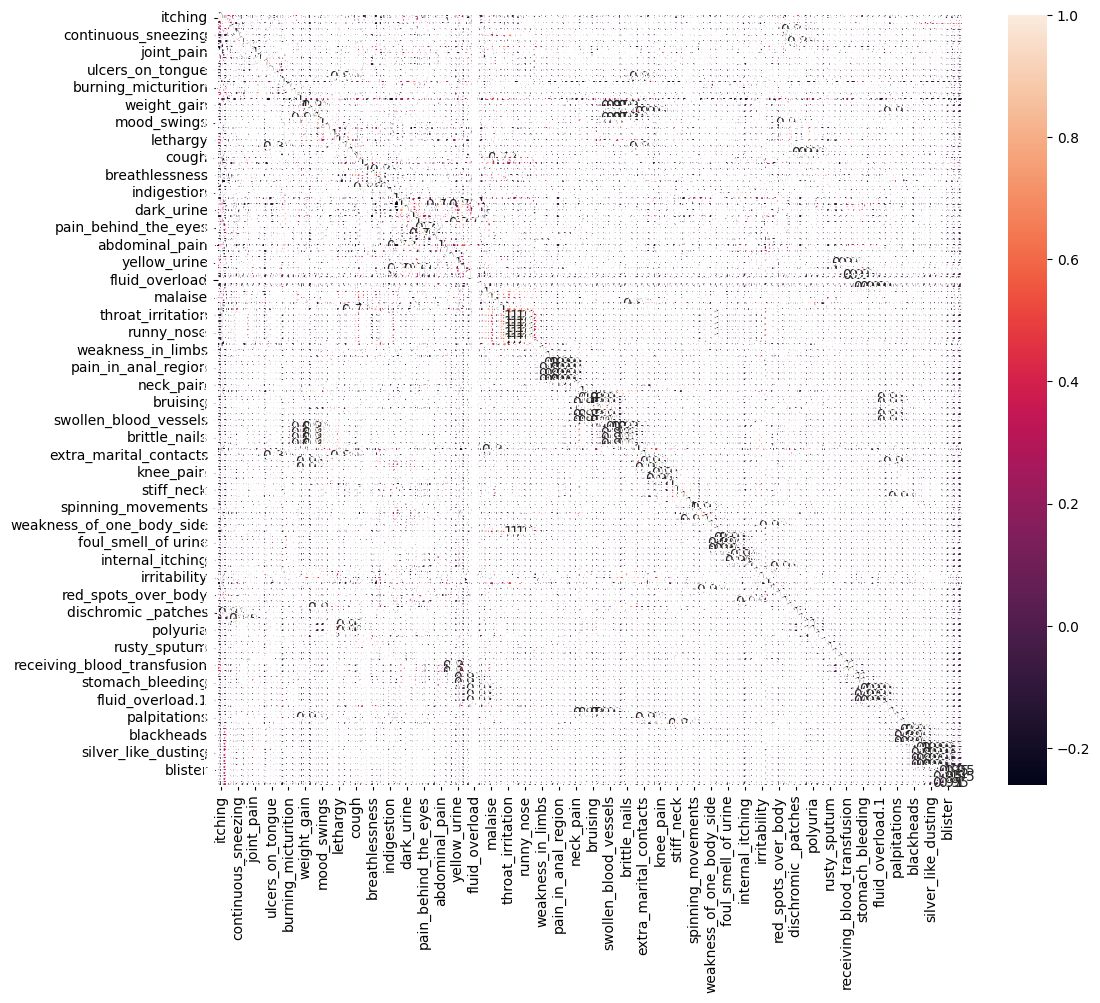

In [14]:
plt.figure(figsize=(12, 10))
sns.heatmap(X_train.corr(), annot=True)
plt.show()

In [15]:
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.fit_transform(y_test)

In [16]:
gb_clf = GradientBoostingClassifier()
gb_clf.fit(X_train, y_train)

GradientBoostingClassifier()

In [17]:
y_pred = gb_clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 97.62%


In [18]:
import joblib

In [19]:
joblib.dump(gb_clf, 'gradient_boosting_DiseaseCLFmodel_97_perc.joblib')
joblib.dump(le, 'label_encoder.joblib')

['label_encoder.joblib']

In [32]:
import warnings
warnings.filterwarnings('ignore')

In [35]:
import pandas as pd
import joblib
import random
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import LabelEncoder


loaded_model = joblib.load('/kaggle/working/gradient_boosting_DiseaseCLFmodel_97_perc.joblib')
loaded_encoder = joblib.load('/kaggle/working/label_encoder.joblib')

columns = ['itching',
 'skin_rash',
 'nodal_skin_eruptions',
 'continuous_sneezing',
 'shivering',
 'chills',
 'joint_pain',
 'stomach_pain',
 'acidity',
 'ulcers_on_tongue',
 'muscle_wasting',
 'vomiting',
 'burning_micturition',
 'spotting_ urination',
 'fatigue',
 'weight_gain',
 'anxiety',
 'cold_hands_and_feets',
 'mood_swings',
 'weight_loss',
 'restlessness',
 'lethargy',
 'patches_in_throat',
 'irregular_sugar_level',
 'cough',
 'high_fever',
 'sunken_eyes',
 'breathlessness',
 'sweating',
 'dehydration',
 'indigestion',
 'headache',
 'yellowish_skin',
 'dark_urine',
 'nausea',
 'loss_of_appetite',
 'pain_behind_the_eyes',
 'back_pain',
 'constipation',
 'abdominal_pain',
 'diarrhoea',
 'mild_fever',
 'yellow_urine',
 'yellowing_of_eyes',
 'acute_liver_failure',
 'fluid_overload',
 'swelling_of_stomach',
 'swelled_lymph_nodes',
 'malaise',
 'blurred_and_distorted_vision',
 'phlegm',
 'throat_irritation',
 'redness_of_eyes',
 'sinus_pressure',
 'runny_nose',
 'congestion',
 'chest_pain',
 'weakness_in_limbs',
 'fast_heart_rate',
 'pain_during_bowel_movements',
 'pain_in_anal_region',
 'bloody_stool',
 'irritation_in_anus',
 'neck_pain',
 'dizziness',
 'cramps',
 'bruising',
 'obesity',
 'swollen_legs',
 'swollen_blood_vessels',
 'puffy_face_and_eyes',
 'enlarged_thyroid',
 'brittle_nails',
 'swollen_extremeties',
 'excessive_hunger',
 'extra_marital_contacts',
 'drying_and_tingling_lips',
 'slurred_speech',
 'knee_pain',
 'hip_joint_pain',
 'muscle_weakness',
 'stiff_neck',
 'swelling_joints',
 'movement_stiffness',
 'spinning_movements',
 'loss_of_balance',
 'unsteadiness',
 'weakness_of_one_body_side',
 'loss_of_smell',
 'bladder_discomfort',
 'foul_smell_of urine',
 'continuous_feel_of_urine',
 'passage_of_gases',
 'internal_itching',
 'toxic_look_(typhos)',
 'depression',
 'irritability',
 'muscle_pain',
 'altered_sensorium',
 'red_spots_over_body',
 'belly_pain',
 'abnormal_menstruation',
 'dischromic _patches',
 'watering_from_eyes',
 'increased_appetite',
 'polyuria',
 'family_history',
 'mucoid_sputum',
 'rusty_sputum',
 'lack_of_concentration',
 'visual_disturbances',
 'receiving_blood_transfusion',
 'receiving_unsterile_injections',
 'coma',
 'stomach_bleeding',
 'distention_of_abdomen',
 'history_of_alcohol_consumption',
 'fluid_overload.1',
 'blood_in_sputum',
 'prominent_veins_on_calf',
 'palpitations',
 'painful_walking',
 'pus_filled_pimples',
 'blackheads',
 'scurring',
 'skin_peeling',
 'silver_like_dusting',
 'small_dents_in_nails',
 'inflammatory_nails',
 'blister',
 'red_sore_around_nose',
 'yellow_crust_ooze']

symptoms = [random.randint(0, 1) for _ in range(len(columns))]
new_data = pd.DataFrame([symptoms], columns=columns)
prediction = loaded_model.predict(new_data)

disease = loaded_encoder.inverse_transform([prediction])[0]
print(f"Predicted disease: {disease}")

Predicted disease: Tuberculosis


# HyperTuning

In [ ]:
from hyperopt import fmin, tpe, hp, STATUS_OK, Trials

In [ ]:
def objective(params):
    n_estimators = int(params['n_estimators'])
    max_depth = int(params['max_depth'])
    learning_rate = params['learning_rate']
    
    gb_clf = GradientBoostingClassifier(n_estimators=n_estimators,
                                        max_depth=max_depth,
                                        learning_rate=learning_rate,
                                        random_state=42)
    
    gb_clf.fit(X_train, y_train)
    y_pred = gb_clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    
    return {'loss': -accuracy, 'status': STATUS_OK}

In [ ]:
search_space = {
    'n_estimators': hp.quniform('n_estimators', 100, 500, 50),
    'max_depth': hp.quniform('max_depth', 2, 10, 1),
    'learning_rate': hp.loguniform('learning_rate', np.log(0.01), np.log(0.5))
}

In [ ]:
trials = Trials()
best = fmin(fn=objective,
            space=search_space,
            algo=tpe.suggest,
            max_evals=100,
            trials=trials)

In [ ]:
import joblib

In [ ]:
joblib.dump(gb_clf, 'gradient_boosting_model.joblib')
joblib.dump(le, 'label_encoder.joblib')

In [ ]:
print("Best hyperparameters: ", best)

In [ ]:
best_model = GradientBoostingClassifier(n_estimators=int(best['n_estimators']),
                                        max_depth=int(best['max_depth']),
                                        learning_rate=best['learning_rate'],
                                        random_state=42)

In [ ]:
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy with best model: {accuracy * 100:.2f}%")